In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from IPython.core.display import display, HTML
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
import seaborn as sns
from importlib import reload
import matplotlib.pyplot as plt
import matplotlib
import warnings

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ENGG-13828-1/UNSW_NB15_training-set.csv')

In [ ]:
df.head(10)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.09020,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.00030,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.00510,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.66080,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.00250,...,1,3,0,0,0,2,3,0,Normal,0
5,6,0.000003,udp,-,INT,2,0,784,0,333333.32150,...,1,2,0,0,0,2,2,0,Normal,0
6,7,0.000006,udp,-,INT,2,0,1960,0,166666.66080,...,1,2,0,0,0,2,2,0,Normal,0
7,8,0.000028,udp,-,INT,2,0,1384,0,35714.28522,...,1,3,0,0,0,1,3,0,Normal,0
8,9,0.000000,arp,-,INT,1,0,46,0,0.00000,...,2,2,0,0,0,2,2,1,Normal,0
9,10,0.000000,arp,-,INT,1,0,46,0,0.00000,...,2,2,0,0,0,2,2,1,Normal,0


In [ ]:
df.describe(include='all')

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
count,82332.000000,82332.000000,82332,82332,82332,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332,82332.000000
unique,NaN,NaN,131,13,7,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN
top,NaN,NaN,tcp,-,FIN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,NaN
freq,NaN,NaN,43095,47153,39339,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37000,NaN
mean,41166.500000,1.006756,NaN,NaN,NaN,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,...,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,NaN,0.550600
std,23767.345519,4.710444,NaN,NaN,NaN,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,...,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,NaN,0.497436
min,1.000000,0.000000,NaN,NaN,NaN,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,NaN,0.000000
25%,20583.750000,0.000008,NaN,NaN,NaN,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,NaN,0.000000
50%,41166.500000,0.014138,NaN,NaN,NaN,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,...,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,NaN,1.000000
75%,61749.250000,0.719360,NaN,NaN,NaN,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,...,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,NaN,1.000000


In [ ]:
list_drop = ['id','attack_cat']

In [ ]:
df.drop(list_drop,axis=1,inplace=True)

In [ ]:
DEBUG =0

for feature in df_numeric.columns:
    if DEBUG == 1:
        print(feature)
        print('max = '+str(df_numeric[feature].max()))
        print('75th = '+str(df_numeric[feature].quantile(0.95)))
        print('median = '+str(df_numeric[feature].median()))
        print(df_numeric[feature].max()>10*df_numeric[feature].median())
        print('----------------------------------------------------')
    if df_numeric[feature].max()>10*df_numeric[feature].median() and df_numeric[feature].max()>10 :
        df[feature] = np.where(df[feature]<df[feature].quantile(0.95), df[feature], df[feature].quantile(0.95))

In [ ]:
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.describe(include='all')

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,6.305470e+05,...,4.466611,3.388901,7.456360,0.008284,0.008381,0.092066,5.974809,9.164262,0.011126,0.550600
std,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,2.393001e+06,...,6.685037,5.029129,11.415191,0.091171,0.092485,0.289121,6.867156,11.121413,0.104891,0.497436
min,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,2.112951e+03,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,1.585808e+04,...,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,2.082111e+07,...,25.000000,18.000000,63.000000,2.000000,2.000000,1.000000,25.000000,62.000000,1.000000,1.000000


In [ ]:
df_numeric = df.select_dtypes(include=[np.number])
df_before = df_numeric.copy()
DEBUG = 0
for feature in df_numeric.columns:
    if DEBUG == 1:
        print(feature)
        print('nunique = '+str(df_numeric[feature].nunique()))
        print(df_numeric[feature].nunique()>50)
        print('----------------------------------------------------')
    if df_numeric[feature].nunique()>50:
        if df_numeric[feature].min()==0:
            df[feature] = np.log(df[feature]+1)
        else:
            df[feature] = np.log(df[feature])

df_numeric = df.select_dtypes(include=[np.number])

In [ ]:
df_cat = df.select_dtypes(exclude=[np.number])
df_cat.describe(include='all')

,proto,service,state
count,82332,82332,82332
unique,131,13,7
top,tcp,-,FIN
freq,43095,47153,39339


In [ ]:
DEBUG = 0
for feature in df_cat.columns:
    if DEBUG == 1:
        print(feature)
        print('nunique = '+str(df_cat[feature].nunique()))
        print(df_cat[feature].nunique()>6)
        print(sum(df[feature].isin(df[feature].value_counts().head().index)))
        print('----------------------------------------------------')

    if df_cat[feature].nunique()>6:
        df[feature] = np.where(df[feature].isin(df[feature].value_counts().head().index), df[feature], '-')

In [ ]:
df_cat = df.select_dtypes(exclude=[np.number])
df_cat.describe(include='all')

,proto,service,state
count,82332,82332,82332
unique,6,5,6
top,tcp,-,FIN
freq,43095,49275,39339


In [ ]:
df['proto'].value_counts().head().index

Index(['tcp', 'udp', '-', 'unas', 'arp'], dtype='object')

In [ ]:
df['proto'].value_counts().index

Index(['tcp', 'udp', '-', 'unas', 'arp', 'ospf'], dtype='object')

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
X.head()
feature_names = list(X.columns)
np.shape(X)

(82332, 42)

In [ ]:
np.shape(X)

(82332, 42)

In [ ]:
# Clamp extreme Values
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.describe(include='all')

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,0.334407,1.808923,1.440529,6.310668,3.996915,7.500001,180.967667,95.713003,13.583906,5.846184,...,4.466611,3.388901,1.199755,0.008284,0.008381,0.092066,5.974809,1.577070,0.011126,0.550600
std,0.570103,1.239475,1.489938,1.616872,3.815680,4.127117,101.513358,116.667722,4.549500,5.593154,...,6.685037,5.029129,1.178586,0.091171,0.092485,0.289121,6.867156,1.143143,0.104891,0.497436
min,0.000000,0.000000,0.000000,3.178054,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000008,0.693147,0.000000,4.736198,0.000000,3.387981,62.000000,0.000000,9.323979,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.693147,0.000000,0.000000
50%,0.014039,1.791759,1.098612,6.280396,5.187386,7.882759,254.000000,29.000000,13.265605,7.656314,...,1.000000,1.000000,1.098612,0.000000,0.000000,0.000000,3.000000,1.609438,0.000000,1.000000
75%,0.541952,2.484907,2.397895,7.154615,6.863803,11.618295,254.000000,252.000000,17.992093,9.671498,...,4.000000,3.000000,1.791759,0.000000,0.000000,0.000000,7.000000,2.397895,0.000000,1.000000
max,4.110874,9.272940,9.307376,16.479663,16.500465,13.815512,255.000000,253.000000,22.384917,16.851478,...,25.000000,18.000000,4.143135,2.000000,2.000000,1.000000,25.000000,4.127134,1.000000,1.000000


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,2,3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
df['proto'].value_counts().head().index

Index(['tcp', 'udp', '-', 'unas', 'arp'], dtype='object')

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
X.head()
feature_names = list(X.columns)
np.shape(X)

(82332, 42)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,2,3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
np.shape(X)

(82332, 56)

In [ ]:
df_cat.describe(include='all')

,proto,service,state
count,82332,82332,82332
unique,6,5,6
top,tcp,-,FIN
freq,43095,49275,39339


In [ ]:
#Split dataset test dan training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 0,
                                                    stratify=y)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 18:] = sc.fit_transform(X_train[:, 18:])
X_test[:, 18:] = sc.transform(X_test[:, 18:])

In [ ]:
import time
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix


In [ ]:
def print_red_on_white(text):
    print('\033[1;37;41m' + text + '\033[0m')

# Example usage
text_to_print = " "
print_red_on_white(text_to_print)


In [ ]:
#Mengimpor metrik-metrik evaluasi
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

import time
import pandas as pd

model_performance = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1-Score','time to train','time to predict','total time'])


In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier
start = time.time()

#Pembuatan Model
model = RandomForestClassifier(n_estimators = 100,n_jobs=-1,random_state=0,bootstrap=True,).fit(X_train,y_train)
end_train = time.time()

# Prediksi pada data uji
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Random Forest'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 97.72%
Recall: 97.72%
Precision: 97.73%
F1-Score: 97.72%
time to train: 10.19 s
time to predict: 0.32 s
total: 10.51 s
CPU times: user 18.5 s, sys: 68.9 ms, total: 18.5 s
Wall time: 10.6 s


Length of feature_names: 42
Length of feature_importances: 56
              Feature  Importance
0                 dur    0.004280
1               proto    0.003174
2             service    0.000830
3               state    0.012689
4               spkts    0.006448
5               dpkts    0.001179
6              sbytes    0.009383
7              dbytes    0.004916
8                rate    0.000449
9                sttl    0.002365
10               dttl    0.000130
11              sload    0.000004
12              dload    0.000008
13              sloss    0.001083
14              dloss    0.001266
15             sinpkt    0.035356
16             dinpkt    0.002237
17               sjit    0.028452
18               djit    0.007144
19               swin    0.020812
20              stcpb    0.053734
21              dtcpb    0.042416
22               dwin    0.043573
23             tcprtt    0.079692
24             synack    0.027432
25             ackdat    0.042447
26              smea

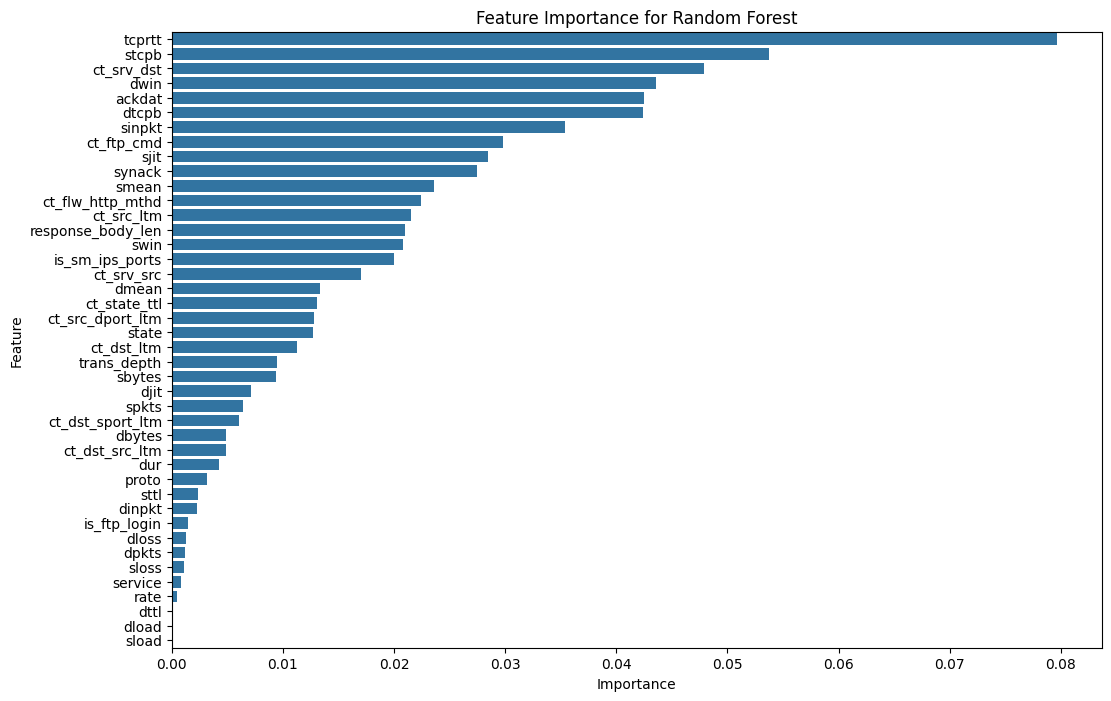

In [ ]:
# Feature Importance for Random Forest
rf_model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0, bootstrap=True)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Check the lengths of arrays
print("Length of feature_names:", len(feature_names))
print("Length of feature_importances:", len(feature_importances))

# Create a DataFrame to store feature names and their importance
#feature_importance_df = pd.DataFrame({'Feature': feature_names[:len(feature_importances)], 'Importance': feature_importances})
# Trim the feature_importances array to match the length of feature_names
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances[:len(feature_names)]})

# Display the feature importance table
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.sort_values(by='Importance', ascending=False))
plt.title('Feature Importance for Random Forest')
plt.show()



Metrics for 5-NN:
Accuracy: 0.9566405538349426
F1 Score: 0.9601784718349136
Precision: 0.9692602184438689
Recall: 0.9512653331859874

Confusion Matrix for 5-NN:
[[7145  273]
 [ 441 8608]]


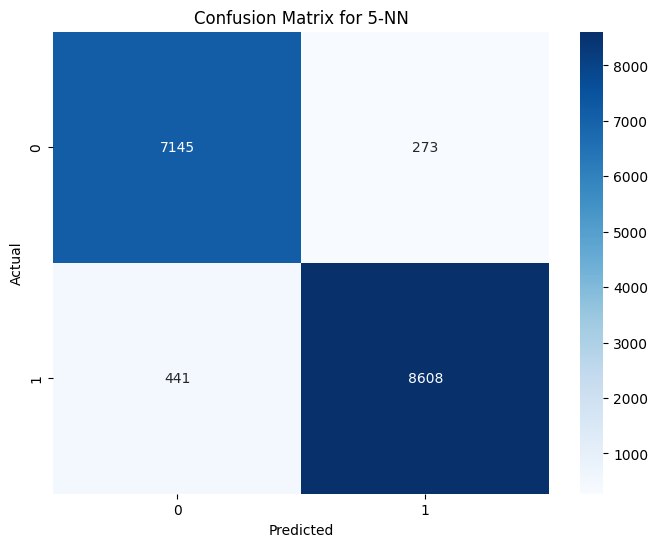

Time to train: 0.0087 seconds
Time to predict: 0 seconds
Total time: 0.0087 seconds
5-NN Training Loss: 0.633003150027052, Test Loss: 0.8732366694832445

Metrics for C4.5:
Accuracy: 0.9665391388838283
F1 Score: 0.9695495993368335
Precision: 0.9697103692239664
Recall: 0.9693888827494751

Confusion Matrix for C4.5:
[[7144  274]
 [ 277 8772]]


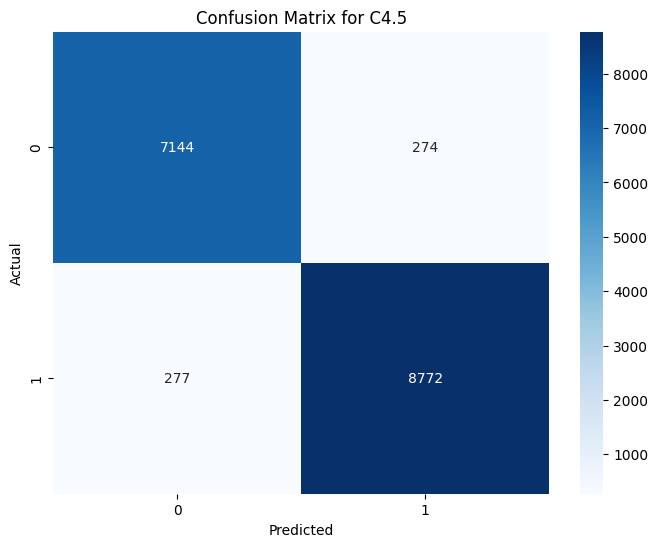

Time to train: 1.1770 seconds
Time to predict: 0 seconds
Total time: 1.1770 seconds
C4.5 Training Loss: 2.104751174553846e-05, Test Loss: inf

Metrics for Naive Bayes:
Accuracy: 0.7650452419991498
F1 Score: 0.7539273675507218
Precision: 0.8880731195684747
Recall: 0.654989501602387

Confusion Matrix for Naive Bayes:
[[6671  747]
 [3122 5927]]


<ipython-input-81-034a15919db3>:50: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(np.log(probabilities[np.arange(len(y)), y]))


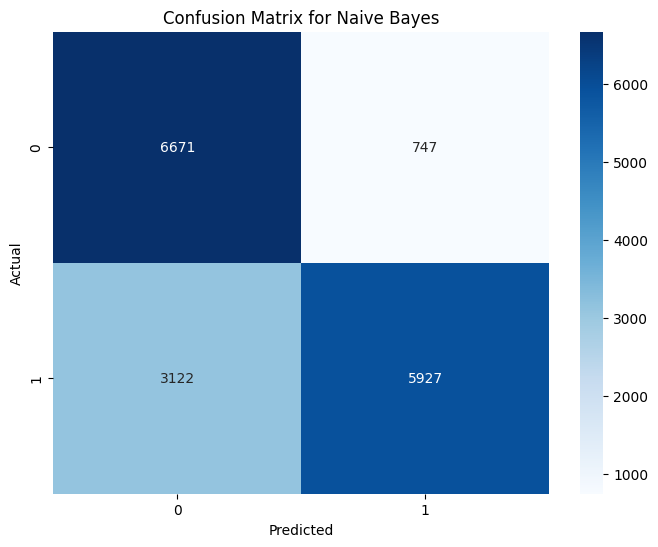

Time to train: 0.0614 seconds
Time to predict: 0 seconds
Total time: 0.0614 seconds
Naive Bayes Training Loss: inf, Test Loss: inf


<ipython-input-81-034a15919db3>:58: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(np.log(probabilities[np.arange(len(y)), y]))
<ipython-input-81-034a15919db3>:58: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(np.log(probabilities[np.arange(len(y)), y]))



Metrics for Ada-boosted Decision Tree:
Accuracy: 0.9455881459889476
F1 Score: 0.9504862953138816
Precision: 0.9505913562506908
Recall: 0.9503812575975246

Confusion Matrix for Ada-boosted Decision Tree:
[[6971  447]
 [ 449 8600]]


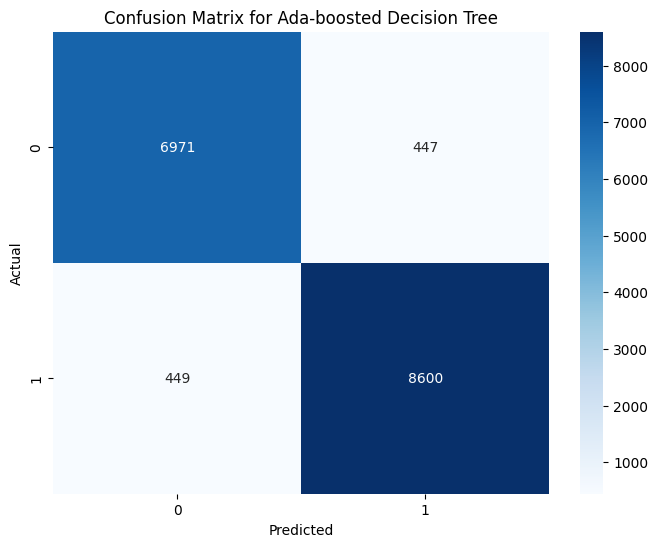

Time to train: 11.0810 seconds
Time to predict: 0 seconds
Total time: 11.0810 seconds

Metrics for Random Forest:
Accuracy: 0.9765591789639886
F1 Score: 0.9785793562708102
Precision: 0.9828335748523018
Recall: 0.9743618079345784

Confusion Matrix for Random Forest:
[[7264  154]
 [ 232 8817]]


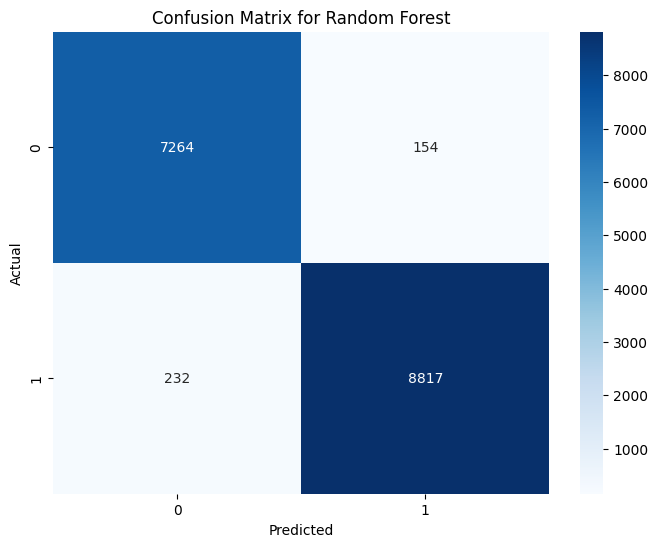

Time to train: 9.2777 seconds
Time to predict: 0 seconds
Total time: 9.2777 seconds

Metrics for KNN:
Accuracy: 0.9566405538349426
F1 Score: 0.9601784718349136
Precision: 0.9692602184438689
Recall: 0.9512653331859874

Confusion Matrix for KNN:
[[7145  273]
 [ 441 8608]]


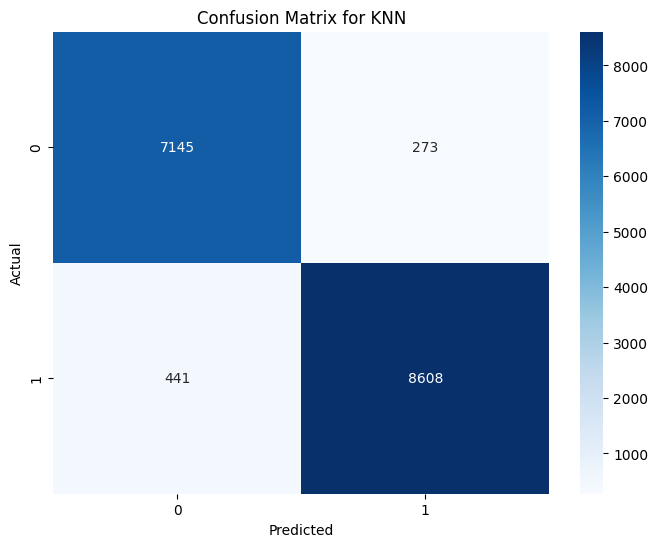

Time to train: 0.0103 seconds
Time to predict: 0 seconds
Total time: 0.0103 seconds

Metrics for 5-NN:
Accuracy: 0.9566405538349426
F1 Score: 0.9601784718349136
Precision: 0.9692602184438689
Recall: 0.9512653331859874

Confusion Matrix for 5-NN:
[[7145  273]
 [ 441 8608]]


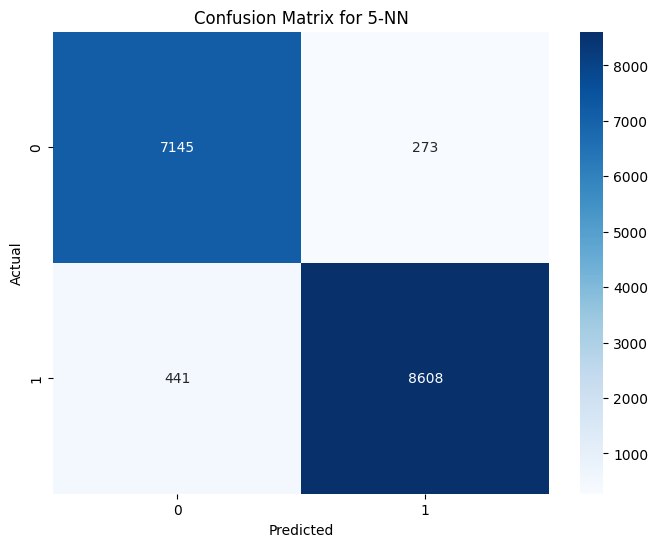

Time to train: 0.0103 seconds
Time to predict: 0 seconds
Total time: 0.0103 seconds

Metrics for C4.5:
Accuracy: 0.9665391388838283
F1 Score: 0.9695495993368335
Precision: 0.9697103692239664
Recall: 0.9693888827494751

Confusion Matrix for C4.5:
[[7144  274]
 [ 277 8772]]


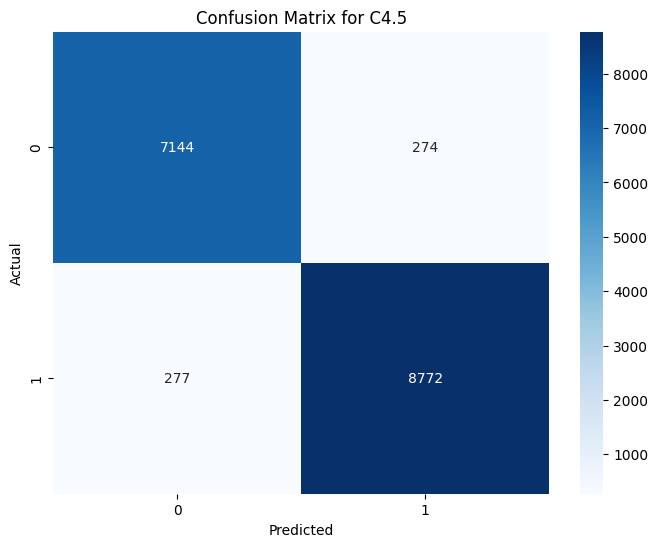

Time to train: 0.0103 seconds
Time to predict: 0 seconds
Total time: 0.0103 seconds

Metrics for Naive Bayes:
Accuracy: 0.7650452419991498
F1 Score: 0.7539273675507218
Precision: 0.8880731195684747
Recall: 0.654989501602387

Confusion Matrix for Naive Bayes:
[[6671  747]
 [3122 5927]]


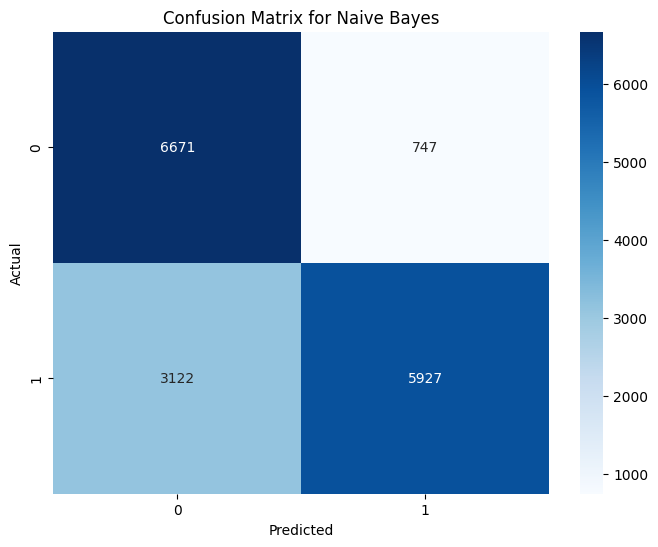

Time to train: 0.0103 seconds
Time to predict: 0 seconds
Total time: 0.0103 seconds

Metrics for Ada-boosted Decision Tree:
Accuracy: 0.9455881459889476
F1 Score: 0.9504862953138816
Precision: 0.9505913562506908
Recall: 0.9503812575975246

Confusion Matrix for Ada-boosted Decision Tree:
[[6971  447]
 [ 449 8600]]


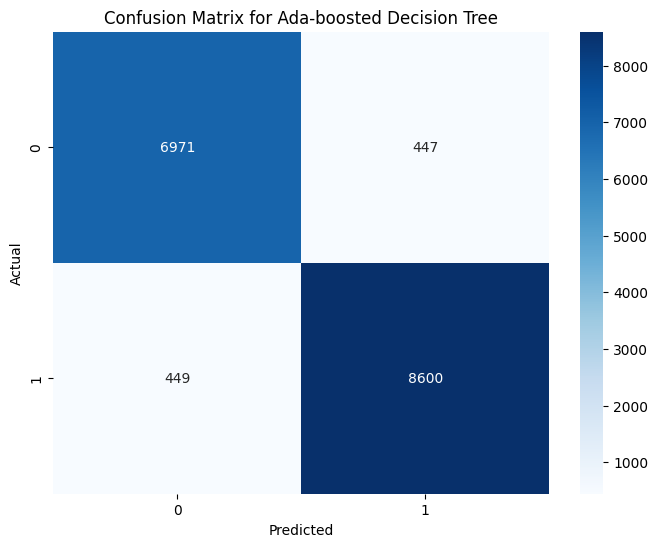

Time to train: 0.0103 seconds
Time to predict: 0 seconds
Total time: 0.0103 seconds

Metrics for KNN:
Accuracy: 0.9566405538349426
F1 Score: 0.9601784718349136
Precision: 0.9692602184438689
Recall: 0.9512653331859874

Confusion Matrix for KNN:
[[7145  273]
 [ 441 8608]]


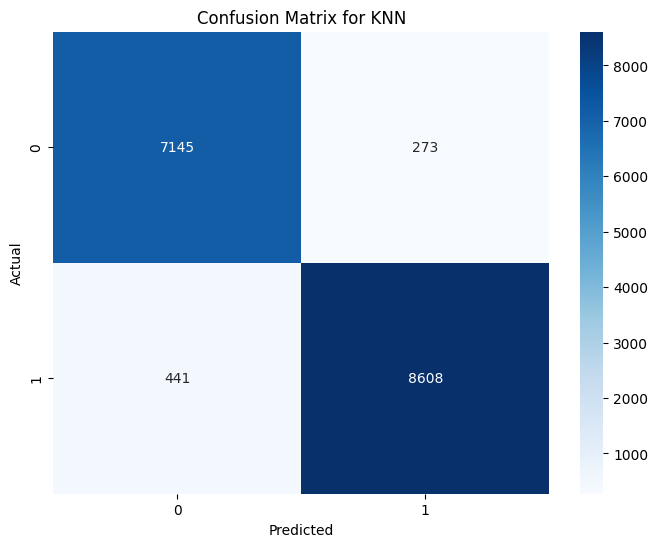

Time to train: 0.0103 seconds
Time to predict: 0 seconds
Total time: 0.0103 seconds


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Helper function to evaluate and print metrics
def evaluate_model(y_true, y_pred, model_name, start_time, end_time):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)

    print(f"\nMetrics for {model_name}:")
    print(f"Accuracy: {acc}")
    print(f"F1 Score: {f1}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")

    # Confusion Matrix
    print(f"\nConfusion Matrix for {model_name}:")
    cm = confusion_matrix(y_true, y_pred)
    print(cm)

    # Visualize Confusion Matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    total_time = end_time - start_time
    print(f"Time to train: {total_time:.4f} seconds")
    print(f"Time to predict: 0 seconds")  # Placeholder for KNN, as it doesn't require additional prediction time
    print(f"Total time: {total_time:.4f} seconds")


def custom_loss(model, X, y):
    if isinstance(model, KNeighborsClassifier):
        # Placeholder for KNN custom loss calculation
        # In KNN, you might use decision_function to get distances and assign a loss based on the distance
        # The following is a simplistic example and may not be suitable for all cases
        distances, _ = model.kneighbors(X)
        loss = np.mean(distances)
        return loss

    elif isinstance(model, DecisionTreeClassifier):
        # Placeholder for Decision Tree custom loss calculation
        # In a Decision Tree, you might use decision_function to get probabilities and calculate a loss
        # The following is a simplistic example and may not be suitable for all cases
        probabilities = model.predict_proba(X)
        loss = -np.mean(np.log(probabilities[np.arange(len(y)), y]))
        return loss

    elif isinstance(model, GaussianNB):
        # Placeholder for Naive Bayes custom loss calculation
        # In Naive Bayes, you might use decision_function to get probabilities and calculate a loss
        # The following is a simplistic example and may not be suitable for all cases
        probabilities = model.predict_proba(X)
        loss = -np.mean(np.log(probabilities[np.arange(len(y)), y]))
        return loss

    else:
        # Add custom loss calculation for other models if needed
        raise NotImplementedError("Custom loss not implemented for this model type")

# 1. 5-NN
start_time = time.time()
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
end_time = time.time()
knn_pred = knn_model.predict(X_test)
evaluate_model(y_test, knn_pred, '5-NN', start_time, end_time)
model_performance.loc['5-NN'] = [accuracy_score(y_test, knn_pred),
                                 recall_score(y_test, knn_pred, average='weighted'),
                                 precision_score(y_test, knn_pred, average='weighted'),
                                 f1_score(y_test, knn_pred, average='weighted'),
                                 end_time - start_time, 0, end_time - start_time]

# Replace the following lines with your custom loss calculation for 5-NN
train_loss_knn = custom_loss(knn_model, X_train, y_train)
test_loss_knn = custom_loss(knn_model, X_test, y_test)
print(f'5-NN Training Loss: {train_loss_knn}, Test Loss: {test_loss_knn}')

# 2. C4.5 (Decision Tree)
start_time = time.time()
c45_model = DecisionTreeClassifier()
c45_model.fit(X_train, y_train)
end_time = time.time()
c45_pred = c45_model.predict(X_test)
evaluate_model(y_test, c45_pred, 'C4.5', start_time, end_time)
model_performance.loc['C4.5'] = [accuracy_score(y_test, c45_pred),
                                  recall_score(y_test, c45_pred, average='weighted'),
                                  precision_score(y_test, c45_pred, average='weighted'),
                                  f1_score(y_test, c45_pred, average='weighted'),
                                  end_time - start_time, 0, end_time - start_time]

train_loss_c45 = custom_loss(c45_model, X_train, y_train)
test_loss_c45 = custom_loss(c45_model, X_test, y_test)
print(f'C4.5 Training Loss: {train_loss_c45}, Test Loss: {test_loss_c45}')

# 3. Naive Bayes
start_time = time.time()
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
end_time = time.time()
nb_pred = nb_model.predict(X_test)
evaluate_model(y_test, nb_pred, 'Naive Bayes', start_time, end_time)
model_performance.loc['Naive Bayes'] = [accuracy_score(y_test, nb_pred),
                                         recall_score(y_test, nb_pred, average='weighted'),
                                         precision_score(y_test, nb_pred, average='weighted'),
                                         f1_score(y_test, nb_pred, average='weighted'),
                                         end_time - start_time, 0, end_time - start_time]


train_loss_nb = custom_loss(nb_model, X_train, y_train)
test_loss_nb = custom_loss(nb_model, X_test, y_test)
print(f'Naive Bayes Training Loss: {train_loss_nb}, Test Loss: {test_loss_nb}')

# 4. Ada-boosted Decision Tree
start_time = time.time()
ada_boost_model = AdaBoostClassifier()
ada_boost_model.fit(X_train, y_train)
end_time = time.time()
ada_boost_pred = ada_boost_model.predict(X_test)
evaluate_model(y_test, ada_boost_pred, 'Ada-boosted Decision Tree', start_time, end_time)
model_performance.loc['Ada-boosted Decision Tree'] = [accuracy_score(y_test, ada_boost_pred),
                                                      recall_score(y_test, ada_boost_pred, average='weighted'),
                                                      precision_score(y_test, ada_boost_pred, average='weighted'),
                                                      f1_score(y_test, ada_boost_pred, average='weighted'),
                                                      end_time - start_time, 0, end_time - start_time]


# 5. Random Forest
start_time = time.time()
random_forest_model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0, bootstrap=True)
random_forest_model.fit(X_train, y_train)
end_time = time.time()
random_forest_pred = random_forest_model.predict(X_test)
evaluate_model(y_test, random_forest_pred, 'Random Forest', start_time, end_time)
model_performance.loc['Random Forest'] = [accuracy_score(y_test, random_forest_pred),
                                          recall_score(y_test, random_forest_pred, average='weighted'),
                                          precision_score(y_test, random_forest_pred, average='weighted'),
                                          f1_score(y_test, random_forest_pred, average='weighted'),
                                          end_time - start_time, 0, end_time - start_time]

# 6. KNN (Another instance for K-Nearest Neighbors)
start_time = time.time()
knn_model_2 = KNeighborsClassifier()
knn_model_2.fit(X_train, y_train)
end_time = time.time()
knn_pred_2 = knn_model_2.predict(X_test)
evaluate_model(y_test, knn_pred_2, 'KNN', start_time, end_time)
model_performance.loc['KNN'] = [accuracy_score(y_test, knn_pred_2),
                                 recall_score(y_test, knn_pred_2, average='weighted'),
                                 precision_score(y_test, knn_pred_2, average='weighted'),
                                 f1_score(y_test, knn_pred_2, average='weighted'),
                                 end_time - start_time, 0, end_time - start_time]

# Make sure to call this function for each model
evaluate_model(y_test, knn_pred, '5-NN', start_time, end_time)
evaluate_model(y_test, c45_pred, 'C4.5', start_time, end_time)
evaluate_model(y_test, nb_pred, 'Naive Bayes', start_time, end_time)
evaluate_model(y_test, ada_boost_pred, 'Ada-boosted Decision Tree', start_time, end_time)
evaluate_model(y_test, knn_pred_2, 'KNN', start_time, end_time)



Metrics for C4.5:
Accuracy: 0.966296228821279
F1 Score: 0.9662968418642688
Precision: 0.9662975196371558
Recall: 0.966296228821279

Confusion Matrix for C4.5:
[[7142  276]
 [ 279 8770]]


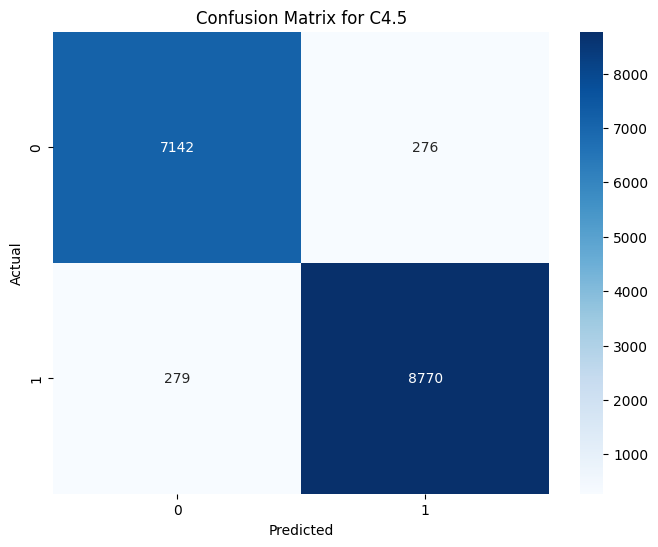

Time to train: 1.6547 seconds
Total time: 1.6547 seconds
515/515 [==============================] - 1s 1ms/step

Metrics for Neural Network:
Accuracy: 0.9602234772575454
F1 Score: 0.9602615255142403
Precision: 0.9605226606079277
Recall: 0.9602234772575454

Confusion Matrix for Neural Network:
[[7179  239]
 [ 416 8633]]


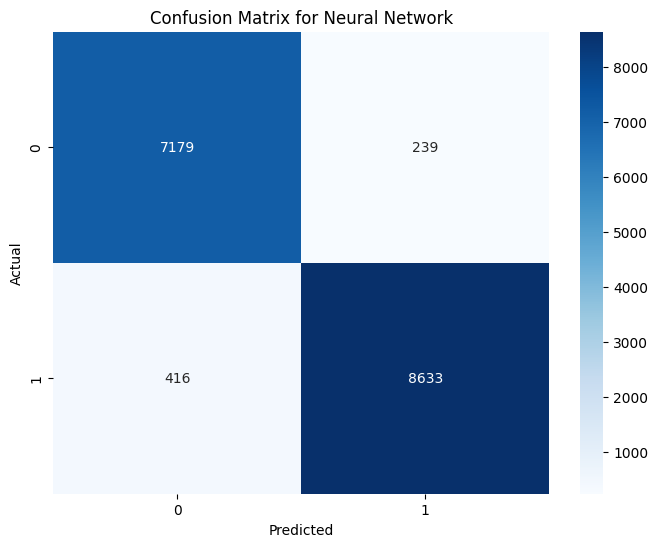

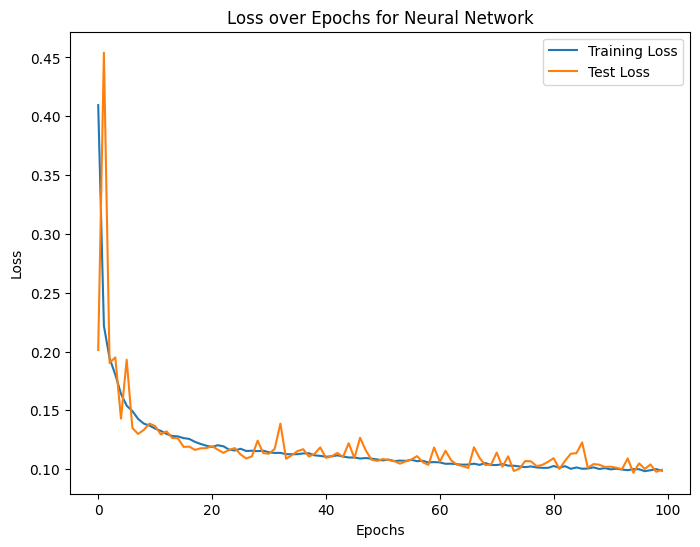

Time to train: 439.6414 seconds
Total time: 439.6414 seconds


In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import History

# Load your data (X, y) here

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Helper function to evaluate and print metrics
def evaluate_model(y_true, y_pred, model_name, start_time, end_time, loss_history=None):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')

    print(f"\nMetrics for {model_name}:")
    print(f"Accuracy: {acc}")
    print(f"F1 Score: {f1}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")

    # Confusion Matrix
    print(f"\nConfusion Matrix for {model_name}:")
    cm = confusion_matrix(y_true, y_pred)
    print(cm)

    # Visualize Confusion Matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    if loss_history is not None:
        # Plot training loss over epochs
        plt.figure(figsize=(8, 6))
        plt.plot(loss_history.history['loss'], label='Training Loss')
        plt.plot(loss_history.history['val_loss'], label='Test Loss')
        plt.title(f'Loss over Epochs for {model_name}')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

    total_time = end_time - start_time
    print(f"Time to train: {total_time:.4f} seconds")
    print(f"Total time: {total_time:.4f} seconds")


# Neural Network Model
def create_neural_network(input_dim, output_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(output_dim, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# C4.5 (Decision Tree)
start_time_c45 = time.time()
c45_model = DecisionTreeClassifier()
c45_model.fit(X_train, y_train)
end_time_c45 = time.time()
c45_pred = c45_model.predict(X_test)
evaluate_model(y_test, c45_pred, 'C4.5', start_time_c45, end_time_c45)

# Convert labels to one-hot encoding
num_classes = len(np.unique(y_train))
y_train_one_hot = np.eye(num_classes)[y_train]
y_test_one_hot = np.eye(num_classes)[y_test]

# Train Neural Network
input_dim = X_train.shape[1]
output_dim = num_classes

start_time = time.time()
nn_model = create_neural_network(input_dim, output_dim)

# Using validation_data to monitor test loss during training
history = nn_model.fit(X_train, y_train_one_hot, epochs=100, validation_data=(X_test, y_test_one_hot), verbose=0)
end_time = time.time()

# Evaluate Neural Network
nn_pred = np.argmax(nn_model.predict(X_test), axis=1)
evaluate_model(y_test, nn_pred, 'Neural Network', start_time, end_time, loss_history=history)
